# Monte Carlo Simulation Project
This notebook demonstrates the implementation of Monte Carlo simulations for forecasting stock prices using Geometric Brownian Motion.  
The analysis includes the following:
- Definition of functions for simulations
- Visualization of trajectories
- Calculation of confidence intervals for final stock prices


## Downloading and Visualizing Historical Stock Data

This section focuses on downloading and visualizing historical stock data using the `yfinance` library.

1. **Function: `download_stock_data`**  
   This function fetches historical stock data for a specified ticker symbol from Yahoo Finance.  
   **Parameters:**
   - `ticker`: Stock ticker symbol (e.g., 'AAPL' for Apple).
   - `start_date`: Start date for the historical data in the format `YYYY-MM-DD`.
   - `end_date`: End date for the historical data in the format `YYYY-MM-DD`.  
   **Returns:** A DataFrame containing columns such as `Open`, `High`, `Low`, `Close`, `Adj Close`, and `Volume`.

2. **Function: `plot_stock_data`**  
   This function visualizes the closing prices of the downloaded stock data.  
   **Parameters:**
   - `data`: The DataFrame containing the stock's historical data.
   - `ticker`: The stock ticker symbol to label the plot.  
   **Returns:** None. Displays a line chart of the stock's closing prices.

3. **Execution:**
   - The historical data for Apple (AAPL) is downloaded from 2005-01-01 to 2023-12-31.
   - The closing prices are plotted to show the stock's historical performance.

[*********************100%***********************]  1 of 1 completed


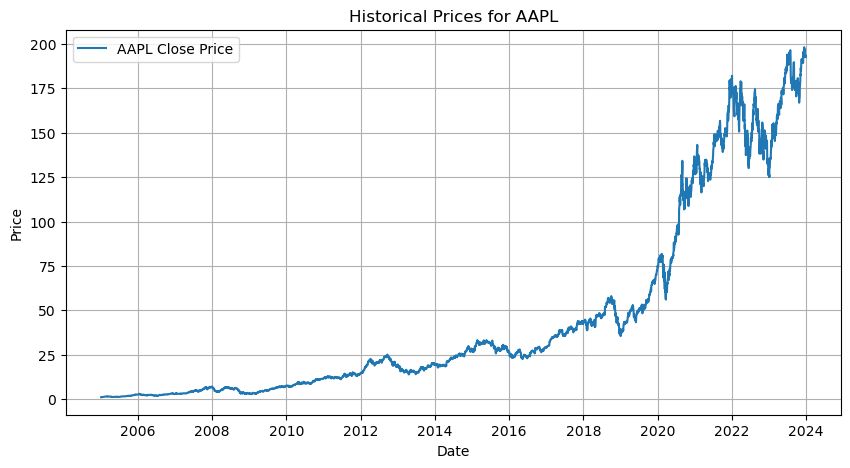

In [1]:
# Import necessary libraries
import yfinance as yf  # yfinance for downloading stock market data
import pandas as pd  # pandas for data manipulation and analysis
import numpy as np  # numpy for numerical operations
import matplotlib.pyplot as plt  # matplotlib for creating visualizations
from scipy.stats import norm

# Define a function to download historical stock data
def download_stock_data(ticker, start_date, end_date):
    # Download the stock data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Define a function to plot the closing prices of a stock
def plot_stock_data(data, ticker):
    plt.figure(figsize=(10, 5)) # Set the figure size for the plot
    plt.plot(data['Close'], label=f'{ticker} Close Price') # Set the figure size for the plot
    plt.title(f'Historical Prices for {ticker}') # Add title and labels to the plot
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Download historical stock data for Apple (AAPL) for the year 2023
data = download_stock_data('AAPL', '2005-01-01', '2023-12-31')

# Plot the historical closing prices for Apple (AAPL)
plot_stock_data(data, 'AAPL')


# Logarithmic Returns
Logarithmic returns provide a more symmetric measure of percentage changes in stock prices. They are computed using the formula:

$$
\text{Log Return}_t = \ln\left(\frac{\text{Price}_t}{\text{Price}_{t-1}}\right)
$$

## Steps:
1. **Calculate Log Returns**: The function `calculate_log_returns` computes the log returns based on the closing prices of the stock.
2. **Plot Log Returns**: The function `plot_log_returns` visualizes the calculated returns over time.

## Interpretation:
The log returns provide insight into the stock's daily price changes, with positive values indicating price increases and negative values indicating decreases.


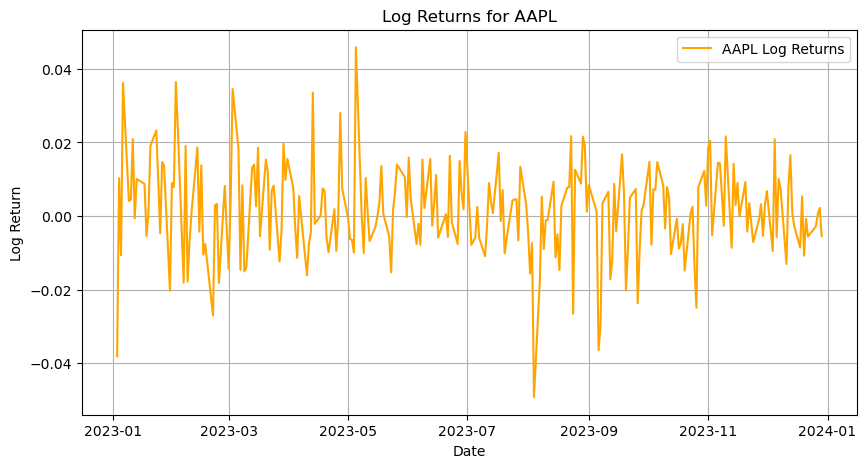

In [2]:
# Define a function to calculate logarithmic returns of a stock
def calculate_log_returns(data):
    data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1)) # Calculate log returns using the formula: log(C_t / C_(t-1))
    return data

# Define a function to plot the logarithmic returns of a stock
def plot_log_returns(data, ticker, start_date= '2023-01-01'):
    filtered_data = data[data.index >= start_date] # Filter historical data to start from the specified date
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_data['Log Returns'], label=f'{ticker} Log Returns', color='orange') # Plot the logarithmic returns of the stock
    plt.title(f'Log Returns for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Log Return')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate the log returns for Apple (AAPL) and add them to the DataFrame
data = calculate_log_returns(data)

# Plot the log returns for Apple (AAPL)
plot_log_returns(data, 'AAPL')


### Monte Carlo Simulations for Stock Prices

Monte Carlo simulations are used to predict possible future trajectories of stock prices. This method assumes that stock prices follow a **Geometric Brownian Motion (GBM)**, defined by the following formula:

$$
S_{t+1} = S_t \cdot e^{(\mu \cdot \Delta t + \sigma \cdot \varepsilon \cdot \sqrt{\Delta t})}
$$

#### Steps:
1. **Calculate `mu` (expected return) and `sigma` (volatility)**:
   - these are estimated from the historical log returns.
2. **Simulate trajectories**:
   - Start from the current stock price.
   - For each time step, update the price using the GBM formula.
3. **Plot the results**:
   - Overlay the historical prices with the simulated trajectories.
   - Display the 95% confidence interval

#### Key Observations:
- The Monte Carlo method generates a range of possible outcomes, reflecting the uncertainty and volatility in stock prices.
- Visualizing both historical data and simulated trajectories helps to analyze future risks and potential returns.
- In our model, we plot 5 different simulations so that the plot is readable. But for the confidence interval, we use 1000 simulations so that our prediction is more robust.


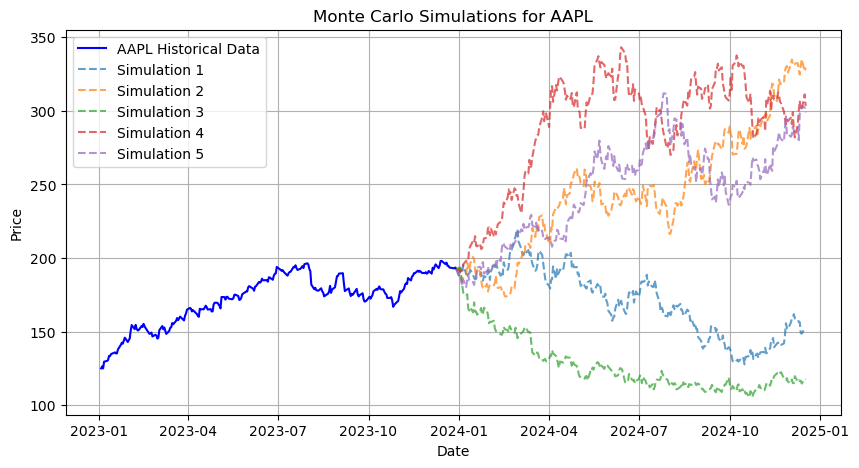

95% Confidence Interval for Final Prices: (265.5938170814656, 276.32374999352174)


In [4]:
# Define a function to simulate Monte Carlo trajectories for stock prices
def monte_carlo_simulation(data, num_simulations, num_days, mu=None, sigma=None):
    # If mu and sigma are not provided, calculate them from historical log returns
    if mu is None or sigma is None:
        mu = data['Log Returns'].mean()
        sigma = data['Log Returns'].std()
    # Initial stock price (last closing price in the historical data)
    S0 = data['Close'].iloc[-1]
    dt = 1  # Time step in days
    simulations = []  # List to store all simulated trajectories
    # Generate Monte Carlo trajectories
    for _ in range(num_simulations):
        prices = [S0]  # Initialize trajectory with the current stock price
        for _ in range(num_days):
            # Calculate drift and shock components
            drift = mu * dt
            shock = sigma * np.random.normal(0, 1) * np.sqrt(dt)
            # Update the price using the geometric Brownian motion formula
            price = prices[-1] * np.exp(drift + shock)
            prices.append(price)
        simulations.append(prices)  # Append the trajectory to the list
    return simulations


# Define a function to plot Monte Carlo simulations alongside historical data
def plot_monte_carlo(data, simulations, ticker, start_date='2023-01-01'):
    # Filter historical data to start from the specified date
    filtered_data = data[data.index >= start_date]
    # Set the figure size for the plot
    plt.figure(figsize=(10, 5))
    # Plot historical closing prices
    plt.plot(filtered_data['Close'], label=f'{ticker} Historical Data', color='blue')
    # Generate a time index for the simulated trajectories
    time_index = pd.date_range(start=data.index[-1], periods=len(simulations[0]), freq='B')
    # Plot each Monte Carlo simulation trajectory
    for i, simulation in enumerate(simulations):
        plt.plot(time_index, simulation, linestyle='--', alpha=0.7, label=f'Simulation {i + 1}')
    # Add title, labels, legend, and grid for better readability
    plt.title(f'Monte Carlo Simulations for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_final_price_confidence_interval(data, num_simulations, num_days, confidence, mu, sigma):
    # Use historical mu and sigma if not provided
    if mu is None or sigma is None:
        mu = data['Log Returns'].mean()
        sigma = data['Log Returns'].std()
    # Initial stock price (last closing price in the historical data)
    S0 = data['Close'].iloc[-1]
    dt = 1  # Time step in days
    final_prices = []  # List to store final values of simulations
    # Generate Monte Carlo trajectories
    for _ in range(num_simulations):
        prices = [S0]  # Initialize trajectory with the current stock price
        for _ in range(num_days):
            # Calculate drift and shock components
            drift = mu * dt
            shock = sigma * np.random.normal(0, 1) * np.sqrt(dt)
            # Update the price using the geometric Brownian motion formula
            price = prices[-1] * np.exp(drift + shock)
            prices.append(price)
        final_prices.append(prices[-1])  # Store the final price of this trajectory
    # Convert final prices to a numpy array
    final_prices = np.array(final_prices)
    # Calculate mean and standard error of the final prices
    mean = np.mean(final_prices)
    std_err = np.std(final_prices, ddof=1) / np.sqrt(len(final_prices))  # Error standard of final prices
    # Calculate z-critical value for the confidence level
    z_crit = norm.ppf((1 + confidence) / 2)
    # Calculate margin of error
    margin_of_error = z_crit * std_err
    # Calculate confidence interval
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    return ci_lower, ci_upper

# Run Monte Carlo simulations for Apple (AAPL) for 252 days (1 trading year) with 5 trajectories
simulations = monte_carlo_simulation(data, num_simulations=5, num_days=252)

# Plot the Monte Carlo simulations alongside the historical data starting from 2023-01-01
plot_monte_carlo(data, simulations, 'AAPL', start_date='2023-01-01')

# Calculate the 95% confidence interval with 300 simulations
confidence_interval = calculate_final_price_confidence_interval(data, num_simulations=1000, num_days=252, confidence=0.95, mu=None, sigma=None)
print(f"95% Confidence Interval for Final Prices: {confidence_interval}")


## Exploring Randomized Parameters for Monte Carlo Simulations

In this section, we introduce randomized parameters for the annualized log return (`mu`) and annualized volatility (`sigma`).  
The goal is to compare the behavior and outputs of Monte Carlo simulations using these randomized values versus those derived from historical data.  

### Key Steps:
1. **Randomized Parameters:**
   - `mu_random_annual`: Randomized annualized log return, ranging from 1% to 20%.
   - `sigma_random_annual`: Randomized annualized volatility, ranging from 10% to 40%.
   - These values are converted to daily equivalents (`mu_daily` and `sigma_daily`).

2. **Monte Carlo Simulation:**
   - A new set of simulations is performed using these randomized parameters.
   - This allows for an evaluation of how different assumptions about returns and volatility affect the simulation results.

3. **Confidence Interval Calculation:**
   - A 95% confidence interval is computed for the final stock prices based on the randomized parameters.

This analysis enables us to contrast the outcomes and insights provided by simulations using historical versus randomized inputs, highlighting the sensitivity of the Monte Carlo model to variations in key assumptions.


mu_random (annualized log return): 0.1982, sigma_random (annualized): 0.1886
mu_daily (log): 0.000787, sigma_daily: 0.011882


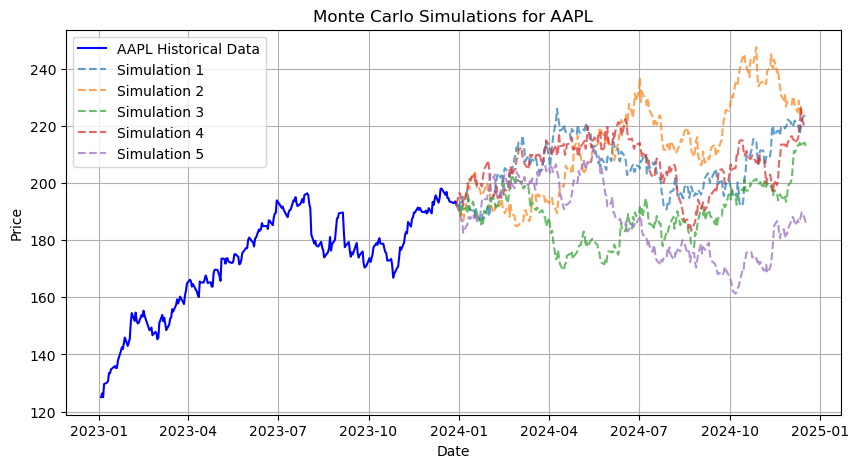

95% Confidence Interval for Final Prices with Random mu and sigma: (239.81448556880605, 245.34845168182767)


In [7]:
# Define realistic ranges for annualized log returns
mu_random_annual = np.random.uniform(0.0, 0.2)  # Annualized log return: 0% to 20%
sigma_random_annual = np.random.uniform(0.1, 0.5)  # Annualized volatility: 10% to 50%

# Convert annualized values to daily values
mu_daily = mu_random_annual / 252  # Daily log return
sigma_daily = sigma_random_annual / np.sqrt(252)  # Daily volatility

# Print the annualized and daily values for mu and sigma
print(f"mu_random (annualized log return): {mu_random_annual:.4f}, sigma_random (annualized): {sigma_random_annual:.4f}")
print(f"mu_daily (log): {mu_daily:.6f}, sigma_daily: {sigma_daily:.6f}")

# Perform Monte Carlo simulation with random mu and sigma
simulations_random = monte_carlo_simulation(data, num_simulations=5, num_days=252, mu=mu_daily, sigma=sigma_daily)

# Plot the simulated trajectories with random mu and sigma
plot_monte_carlo(data, simulations_random, 'AAPL', start_date='2023-01-01')

# Calculate the confidence interval for the final prices from the simulations
confidence_interval_random = calculate_final_price_confidence_interval(
    data, num_simulations=1000, num_days=252, confidence=0.95, mu=mu_daily, sigma=sigma_daily
)

# Print the 95% confidence interval for the final prices
print(f"95% Confidence Interval for Final Prices with Random mu and sigma: {confidence_interval_random}")


## Comparison of Simulations: Historical vs Randomized Parameters

This section compares the results of Monte Carlo simulations using two different approaches for determining the log return (`mu`) and volatility (`sigma`):
1. **Historical Approach**: Parameters derived from the historical data of the stock (using a shorter time period).
2. **Randomized Approach**: Parameters randomly generated within realistic ranges.

### Observations:
1. **Simulation Trajectories**:
   - In the **historical approach**, the trajectories tend to follow trends similar to the historical data, reflecting the actual market dynamics observed over the period used to calculate `mu` and `sigma`.
   - In the **randomized approach**, the trajectories exhibit a broader range of possible outcomes due to the arbitrary nature of the parameters. Some simulations may result in unrealistic price movements (e.g., extreme increases or decreases) depending on the randomly generated values for `mu` and `sigma`.

2. **Confidence Intervals**:
   - **Historical Parameters**: The 95% confidence interval is narrower, indicating that the simulations are more tightly clustered around the historical price trends.
   - **Randomized Parameters**: The confidence interval is wider, reflecting greater uncertainty and variability in the simulated outcomes.

### Why These Results?
- **Historical Parameters**:
  - These are directly derived from past data, making them representative of actual market behavior during the chosen period. As a result, the simulations are more constrained and realistic.
  - However, this approach assumes that past performance is a reliable predictor of future behavior, which might not always hold true.

- **Randomized Parameters**:
  - By introducing randomization, the simulations explore a broader range of potential outcomes, including extreme scenarios. This can be useful for stress testing or assessing risks under different market conditions.
  - The variability arises because the randomly chosen `mu` and `sigma` may not align with the actual market dynamics of the stock.

### Conclusion:
The historical approach provides simulations that are more consistent with the stock's past performance, while the randomized approach offers greater flexibility to explore alternative market scenarios. Both methods have their strengths and weaknesses, and the choice of approach depends on the specific objectives of the analysis.
